In [43]:
import pandas as pd
import datasets
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
dataset = datasets.load_dataset(
    "parquet",
    data_files="hf://datasets/McAuley-Lab/Amazon-Reviews-2023/raw_meta_Electronics/*.parquet"
)

In [45]:
rows = []

for i, item in enumerate(dataset["train"]):
    if i == 100:
        break
    rows.append(item)

data = pd.DataFrame(rows)

In [46]:
data.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,All Electronics,FS-1051 FATSHARK TELEPORTER V3 HEADSET,3.5,6,[],[Teleporter V3 The “Teleporter V3” kit sets a ...,None,"{'hi_res': [None], 'large': ['https://m.media-...","{'title': [], 'url': [], 'user_id': []}",Fat Shark,"[Electronics, Television & Video, Video Glasses]","{""Date First Available"": ""August 2, 2014"", ""Ma...",B00MCW7G9M,None,None,None
1,All Electronics,Ce-H22B12-S1 4Kx2K Hdmi 4Port,5.0,1,"[UPC: 662774021904, Weight: 0.600 lbs]",[HDMI In - HDMI Out],None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",SIIG,"[Electronics, Television & Video, Accessories,...","{""Product Dimensions"": ""0.83 x 4.17 x 2.05 inc...",B00YT6XQSE,None,None,None
2,Computers,Digi-Tatoo Decal Skin Compatible With MacBook ...,4.5,246,[WARNING: Please IDENTIFY MODEL NUMBER on the ...,[],19.99,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': ['AL 2Sides Video', 'MacBook Protect...",Digi-Tatoo,"[Electronics, Computers & Accessories, Laptop ...","{""Brand"": ""Digi-Tatoo"", ""Color"": ""Fresh Marble...",B07SM135LS,None,None,None
3,AMAZON FASHION,NotoCity Compatible with Vivoactive 4 band 22m...,4.5,233,[☛NotoCity 22mm band is designed for Vivoactiv...,[],9.99,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",NotoCity,"[Electronics, Wearable Technology, Clips, Arm ...","{""Date First Available"": ""May 29, 2020"", ""Manu...",B089CNGZCW,None,None,None
4,Cell Phones & Accessories,Motorola Droid X Essentials Combo Pack,3.8,64,"[New Droid X Essentials Combo Pack, Exclusive ...",[all Genuine High Quality Motorola Made Access...,14.99,"{'hi_res': [None, None, None, None, None], 'la...","{'title': [], 'url': [], 'user_id': []}",Verizon,"[Electronics, Computers & Accessories, Compute...","{""Product Dimensions"": ""11.6 x 6.9 x 3.1 inche...",B004E2Z88O,None,None,None


In [47]:
for col in data.columns:
    print(col)

main_category
title
average_rating
rating_number
features
description
price
images
videos
store
categories
details
parent_asin
bought_together
subtitle
author


In [48]:
filtered = data[data["average_rating"] >= 4.5]
filtered = filtered[filtered["price"].notna()]
filtered = filtered[filtered["title"].notna()]


top_products = filtered[["title", "average_rating", "price"]]
top_products.head()

,title,average_rating,price
1,Ce-H22B12-S1 4Kx2K Hdmi 4Port,5.0,None
2,Digi-Tatoo Decal Skin Compatible With MacBook ...,4.5,19.99
3,NotoCity Compatible with Vivoactive 4 band 22m...,4.5,9.99
8,MOSISO Plastic Hard Shell Case & Keyboard Cove...,5.0,None
12,NANW Bands Compatible with Fitbit Versa/Versa ...,4.6,None


In [49]:
top_products.to_csv("top_products.csv", index=False)
top_products.to_parquet("top_products.parquet", index=False)

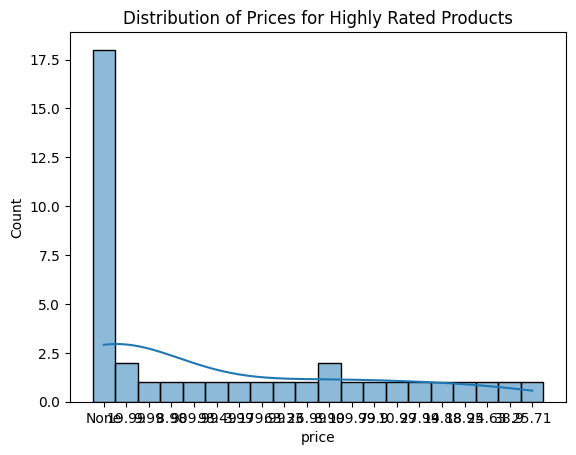

In [52]:
plt.figure()
sns.histplot(
    data=top_products,
    x="price",
    kde=True,
)
plt.title("Distribution of Prices for Highly Rated Products")
plt.show()